Decision Tree Classifier


In [63]:
!pip install category_encoders
import category_encoders as ce
import graphviz 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report


In [64]:
column_names = ['buyingP', 'maintenanceP', 'Ndoors', 'Npersons', 'lug_cap', 'safety', 'carAccept']#['buying_price', 'maint_price', 'num_doors', 'person_cap', 'lug_cap', 'safety', 'car_acceptability']
car_data = pd.read_csv('car_evaluation.csv', names = column_names, header = None)

In [65]:
car_data.head(-5)

,buyingP,maintenanceP,Ndoors,Npersons,lug_cap,safety,carAccept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good


In [66]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buyingP       1728 non-null   object
 1   maintenanceP  1728 non-null   object
 2   Ndoors        1728 non-null   object
 3   Npersons      1728 non-null   object
 4   lug_cap       1728 non-null   object
 5   safety        1728 non-null   object
 6   carAccept     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [67]:
car_data.carAccept.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

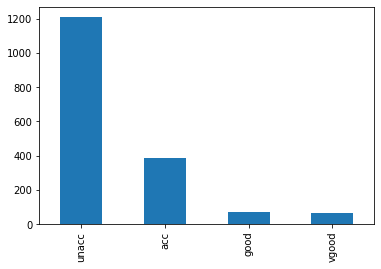

In [68]:
car_data.carAccept.value_counts().plot(kind='bar')

In [69]:
# isnull() method returns a boolean value(True - 1, False - 0) and summing those vals,
# we can find if any value is null
car_data.isnull().sum()

buyingP         0
maintenanceP    0
Ndoors          0
Npersons        0
lug_cap         0
safety          0
carAccept       0
dtype: int64

In [70]:
# Creating Features and Targets
#X = car_data.drop(['car_acceptability'], axis = 1) # Axis 0 - X, 1- Y
#y = car_data['car_acceptability']
X = car_data.drop(['carAccept'], axis = 1)
y = car_data['carAccept']

In [71]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [72]:
X_train.dtypes

buyingP         object
maintenanceP    object
Ndoors          object
Npersons        object
lug_cap         object
safety          object
dtype: object

Category Encoders:
A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques.

In [73]:
cat_encoder = ce.OrdinalEncoder(cols=['buyingP', 'maintenanceP', 'Ndoors', 'Npersons', 'lug_cap', 'safety'])

X_train = cat_encoder.fit_transform(X_train)

X_test = cat_encoder.transform(X_test)

In [74]:
X_train

,buyingP,maintenanceP,Ndoors,Npersons,lug_cap,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2
...,...,...,...,...,...,...
1130,4,4,1,1,1,2
1294,4,3,2,1,3,3
860,2,3,2,1,1,2
1459,3,2,4,3,2,3


In [75]:
X_test.buyingP.unique()

array([2, 4, 3, 1])

In [76]:
dt_class_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=0)
dt_class_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [77]:
y_pred_gini = dt_class_gini.predict(X_test)
acc_score_gini = accuracy_score(y_test, y_pred_gini)
print("Test Accuracy Score with Gini index: ", acc_score_gini)

Test Accuracy Score with Gini index:  0.8966725043782837


In [78]:
y_train_pred_gini = dt_class_gini.predict(X_train)
acc_score_train_gini = accuracy_score(y_train, y_train_pred_gini)
print("Train Accuracy Score with Gini index: ", acc_score_train_gini)

Train Accuracy Score with Gini index:  0.9178910976663786


In [79]:
dt_class_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state=0)
dt_class_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [80]:
y_pred_entropy = dt_class_entropy.predict(X_test)
acc_score_entropy = accuracy_score(y_test, y_pred_entropy)
print("Test Accuracy Score with Entropy index: ", acc_score_entropy)

Test Accuracy Score with Entropy index:  0.8949211908931699


In [81]:
y_train_pred_entropy = dt_class_entropy.predict(X_train)
acc_score_train_entropy = accuracy_score(y_train, y_train_pred_entropy)
print("Train Accuracy Score with Entropy index: ", acc_score_train_entropy)

Train Accuracy Score with Entropy index:  0.9066551426101987


In [82]:
graph = graphviz.Source(tree.export_graphviz(dt_class_entropy, out_file = None, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True, special_characters = True))

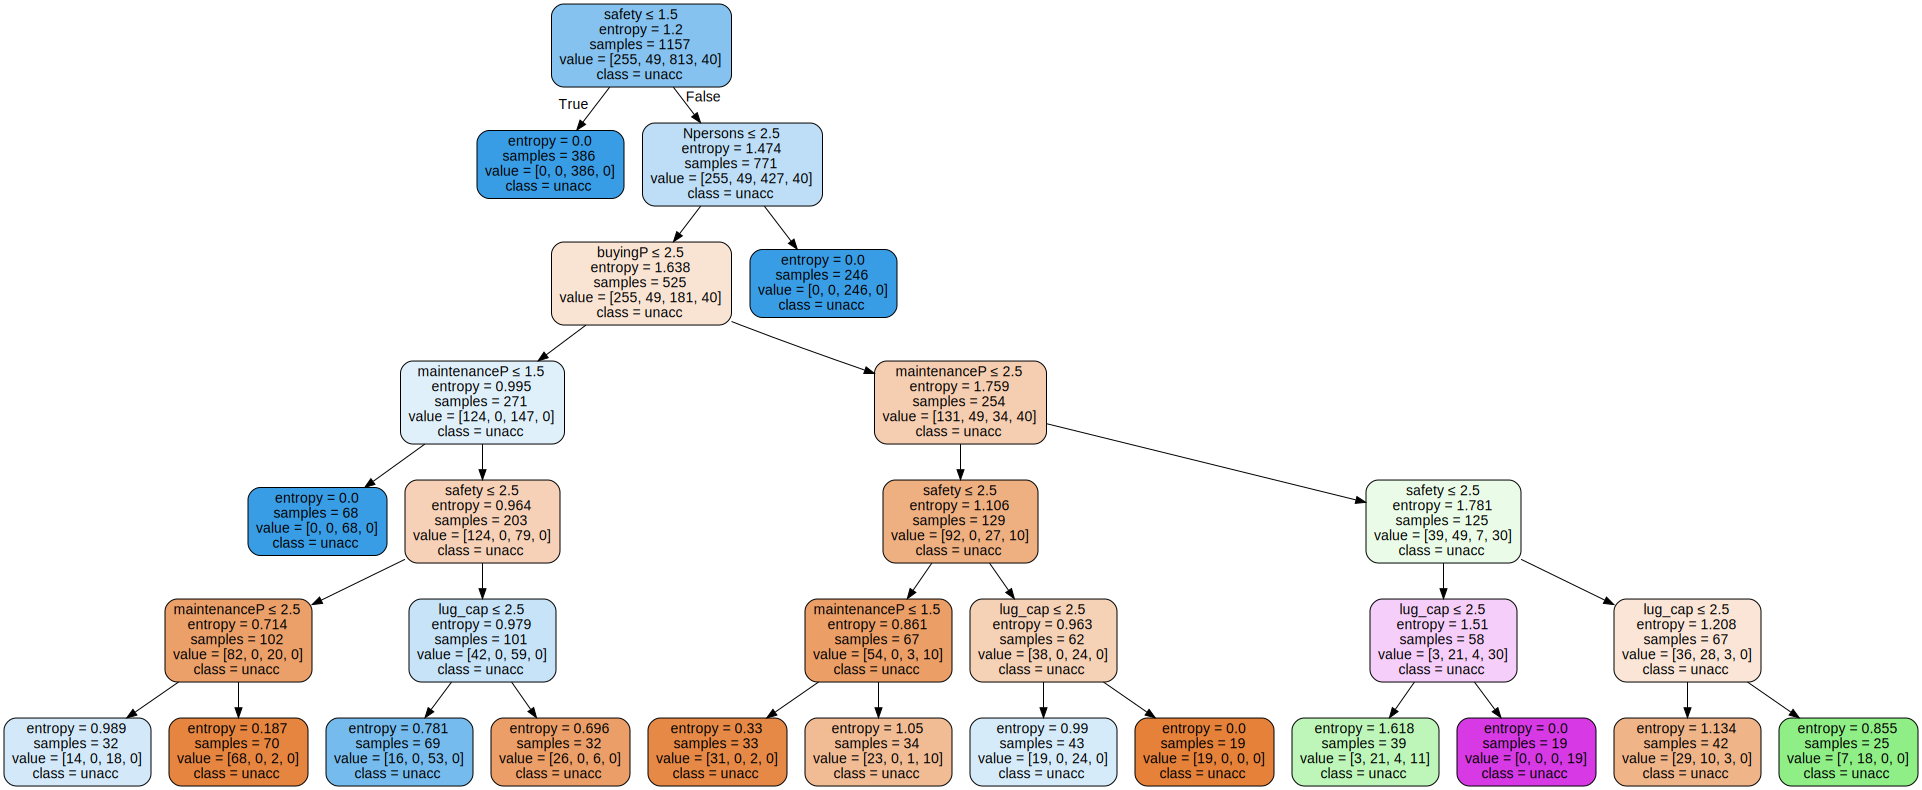

In [83]:
graph

In [84]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.87      0.71      0.78       129
        good       0.47      0.75      0.58        20
       unacc       0.93      0.98      0.96       397
       vgood       1.00      0.52      0.68        25

    accuracy                           0.89       571
   macro avg       0.82      0.74      0.75       571
weighted avg       0.90      0.89      0.89       571

